<h1 style="text-align: center; color: black; font-weight: bold; font-size: 3em;">
    Temporal Analysis of Earthquake and Frequencies Using Visualization
</h1>


## 1. Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 2. Load the Dataset

In [53]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Anshika Singh\python project\Earthquake1.csv")
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,Clean_Time,Month,Day_of_Week,Hour
0,2025-04-06T22:00:23.825Z,-10.5397,162.4478,50.911,4.6,mb,32,140.0,2.695,0.85,...,8.745,0.093,34,reviewed,us,us,06-04-2025 22:00,Apr-25,Sunday,22
1,2025-04-06T21:14:58.810Z,-6.2486,151.6278,10.000,4.6,mb,63,119.0,2.112,0.86,...,1.882,0.076,52,reviewed,us,us,06-04-2025 21:14,Apr-25,Sunday,21
2,2025-04-06T19:30:56.391Z,-6.0582,151.7028,10.000,4.5,mb,38,162.0,1.911,0.98,...,1.879,0.101,29,reviewed,us,us,06-04-2025 19:30,Apr-25,Sunday,19
3,2025-04-06T18:44:14.743Z,38.0696,21.9771,10.000,4.9,mb,98,42.0,0.890,0.56,...,1.639,0.044,160,reviewed,us,us,06-04-2025 18:44,Apr-25,Sunday,18
4,2025-04-06T18:15:08.147Z,-58.7373,-23.7528,10.000,4.9,mb,39,73.0,8.333,0.42,...,1.902,0.089,39,reviewed,us,us,06-04-2025 18:15,Apr-25,Sunday,18
5,2025-04-06T15:16:24.531Z,-6.2594,151.6338,10.000,4.6,mb,18,164.0,2.121,0.87,...,1.931,0.098,35,reviewed,us,us,06-04-2025 15:16,Apr-25,Sunday,15
6,2025-04-06T15:11:30.453Z,-6.2705,151.5352,10.000,4.8,mb,30,86.0,2.158,0.55,...,1.905,0.077,56,reviewed,us,us,06-04-2025 15:11,Apr-25,Sunday,15
7,2025-04-06T11:59:06.284Z,11.8484,-87.5228,36.486,4.9,mb,107,140.0,0.975,1.07,...,5.872,0.025,505,reviewed,us,us,06-04-2025 11:59,Apr-25,Sunday,11
8,2025-04-06T10:57:07.321Z,-38.2210,176.4045,143.714,4.5,mb,46,64.0,0.600,1.55,...,4.620,0.106,26,reviewed,us,us,06-04-2025 10:57,Apr-25,Sunday,10
9,2025-04-06T10:36:59.572Z,83.5057,113.5818,10.000,5.4,mb,116,30.0,12.291,1.06,...,1.871,0.024,611,reviewed,us,us,06-04-2025 10:36,Apr-25,Sunday,10


## 3. Remove Duplicates


In [54]:

df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             13953 non-null  object 
 1   latitude         13953 non-null  float64
 2   longitude        13953 non-null  float64
 3   depth            13953 non-null  float64
 4   mag              13953 non-null  float64
 5   magType          13953 non-null  object 
 6   nst              13953 non-null  int64  
 7   gap              13953 non-null  float64
 8   dmin             13953 non-null  float64
 9   rms              13953 non-null  float64
 10  net              13953 non-null  object 
 11  id               13953 non-null  object 
 12  updated          13953 non-null  object 
 13  place            13953 non-null  object 
 14  type             13953 non-null  object 
 15  horizontalError  13953 non-null  float64
 16  depthError       13953 non-null  float64
 17  magError    

## 4. Check for Null Values

In [19]:

print("Null values in each column:\n", df.isnull().sum())


Null values in each column:
 time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
Clean_Time         0
Month              0
Day_of_Week        0
Hour               0
dtype: int64


## 5. Handle Missing Data

In [20]:
# filling miss depth values with mean
df['depth'] = df['depth'].fillna(df['depth'].mean())

# Drop rows 
df = df.dropna(subset=['mag'])


## 6. View Unique Values in magType Column

In [21]:
print("\nUnique magTypes:\n", df['magType'].unique())



Unique magTypes:
 ['mb' 'mww' 'mwr' 'Mi' 'ml' 'md' 'mw' 'mwb' 'mwp' 'ml(texnet)']


## 7. Count Unique Places

In [22]:
print("\nUnique places count:", df['place'].nunique())



Unique places count: 8903


##  8. Frequency Count of magType



In [23]:
print("\nValue counts for magType:\n", df['magType'].value_counts())


Value counts for magType:
 magType
mb            11050
mww            2444
mwr             387
ml               33
mw               26
mwb               7
md                3
Mi                1
mwp               1
ml(texnet)        1
Name: count, dtype: int64


## 9. Sum of Depth Column

In [24]:
print("\nTotal depth:", df['depth'].sum())



Total depth: 881055.4569


## 10. Average of Magnitude



In [25]:
print("\nAverage magnitude:", df['mag'].mean())



Average magnitude: 4.800136171432667


## 11. Standard Deviation of Magnitude

In [26]:
print("\nStandard deviation of magnitude:", df['mag'].std())



Standard deviation of magnitude: 0.36766499343339565


## 12. Rename Column mag → magnitude

In [27]:
df.rename(columns={'mag': 'magnitude'}, inplace=True)


## 13. Convert time Column to DateTime Format



In [28]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')


 ## 14. Filter Earthquakes with Magnitude ≥ 6.0

In [29]:
strong_quakes = df[df['magnitude'] >= 6.0]
print("\nStrong earthquakes (magnitude ≥ 6.0):", strong_quakes.shape[0])



 232ng earthquakes (magnitude ≥ 6.0):


 ## 15.Sort Data by Magnitude (Descending)

In [30]:
df_sorted = df.sort_values(by='magnitude', ascending=False)


## 16. Reset Index


In [31]:
df_reset = df.reset_index(drop=True)


## 17. Set 'time' Column as Index


In [32]:
df_indexed = df.set_index('time')


## 18. Group by magType and Aggregate Magnitude


In [33]:
grouped = df.groupby('magType')['magnitude'].agg(['count', 'mean'])
print("\nGrouped stats by magType:\n", grouped)



Grouped stats by magType:
             count      mean
magType                    
Mi              1  6.500000
mb          11050  4.684154
md              3  4.616667
ml             33  4.889697
ml(texnet)      1  5.200000
mw             26  4.968462
mwb             7  5.585714
mwp             1  5.250000
mwr           387  4.657364
mww          2444  5.341064


## 19. Merge Dataset with Itself on 'id'

In [34]:
if 'id' in df.columns:
    df_merged = pd.merge(df, df, on='id', how='inner')
    print("\nMerged dataset shape (on 'id'):", df_merged.shape)



Merged dataset shape (on 'id'): (13953, 51)


## 20 .Create New Column: Classify Magnitude



In [35]:
df['mag_class'] = df['magnitude'].apply(lambda x: 'High' if x >= 6.0 else 'Low')


## 21.Create Year Column from time

In [36]:
df['year'] = df['time'].dt.year


 ## Drop Unnecessary Column

In [37]:
if 'net' in df.columns:
    df.drop(columns=['net'], inplace=True)


## Summary Statistics



In [38]:
print("\nSummary statistics:\n", df.describe())



Summary statistics:
            latitude     longitude         depth     magnitude           nst  \
count  13953.000000  13953.000000  13953.000000  13953.000000  13953.000000   
mean       0.553478     41.865230     63.144518      4.800136     69.522970   
std       28.418088    120.652937    112.450288      0.367665     50.848912   
min      -73.220400   -179.997100      1.358000      4.500000      6.000000   
25%      -20.162400    -69.254800     10.000000      4.500000     34.000000   
50%       -1.596700    104.458200     11.750000      4.700000     55.000000   
75%       21.626000    140.183200     62.682000      4.900000     90.000000   
max       86.529500    179.998400    653.779000      7.700000    619.000000   

                gap          dmin           rms  horizontalError  \
count  13953.000000  13953.000000  13953.000000     13953.000000   
mean      90.765829      4.239524      0.708899         8.514657   
std       41.151953      5.455100      0.208605         2.8868

# . Data Analysis and Visualization
 ### Histogram of Earthquake Magnitudes




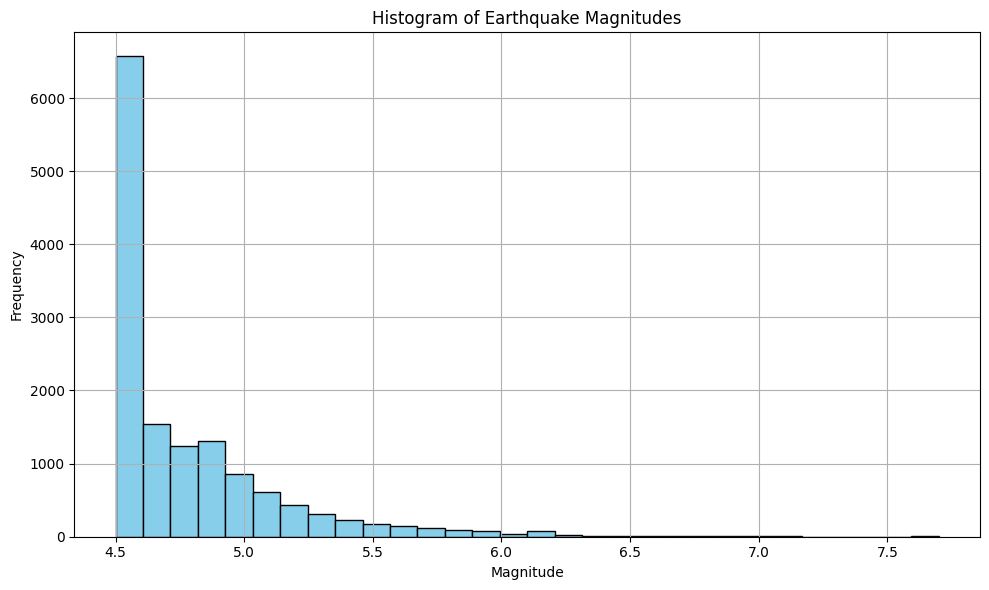

In [39]:
plt.figure(figsize=(10, 6))
df['magnitude'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


##  Year-wise Earthquake Frequency


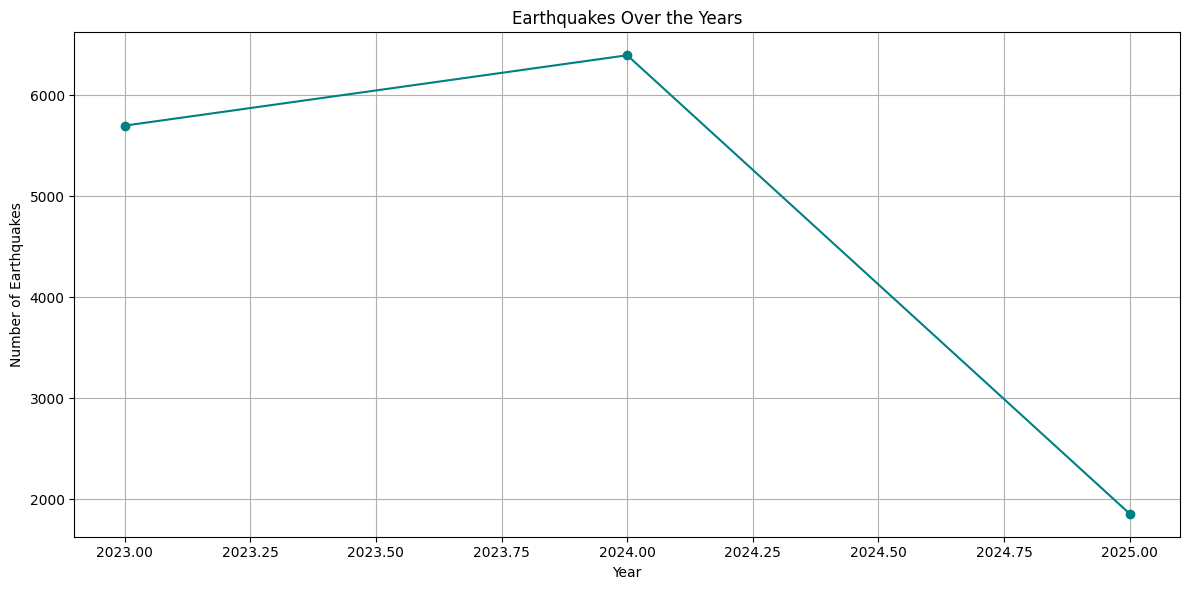

In [40]:
plt.figure(figsize=(12,6))
df['year'].value_counts().sort_index().plot(kind='line', marker='o', color='teal')
plt.title('Earthquakes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.tight_layout()
plt.show()


## Objective 1: Distribution of Earthquake Magnitudes using KDE Plot


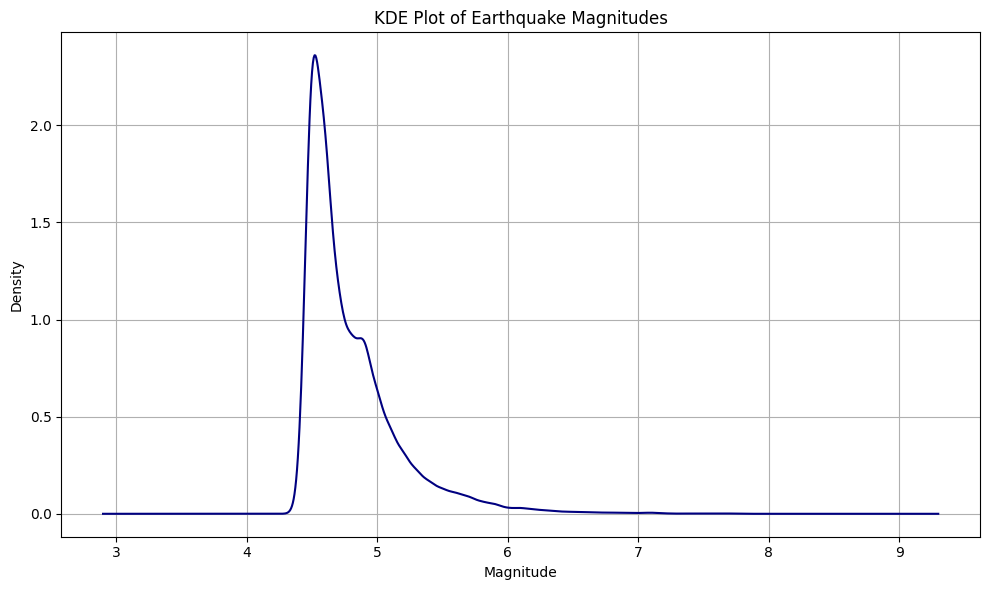

In [41]:
plt.figure(figsize=(10,6))
df['magnitude'].plot(kind='kde', color='navy')
plt.title('KDE Plot of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


## Objective 2: Scatter Plot of Depth vs Magnitude of Earthquakes


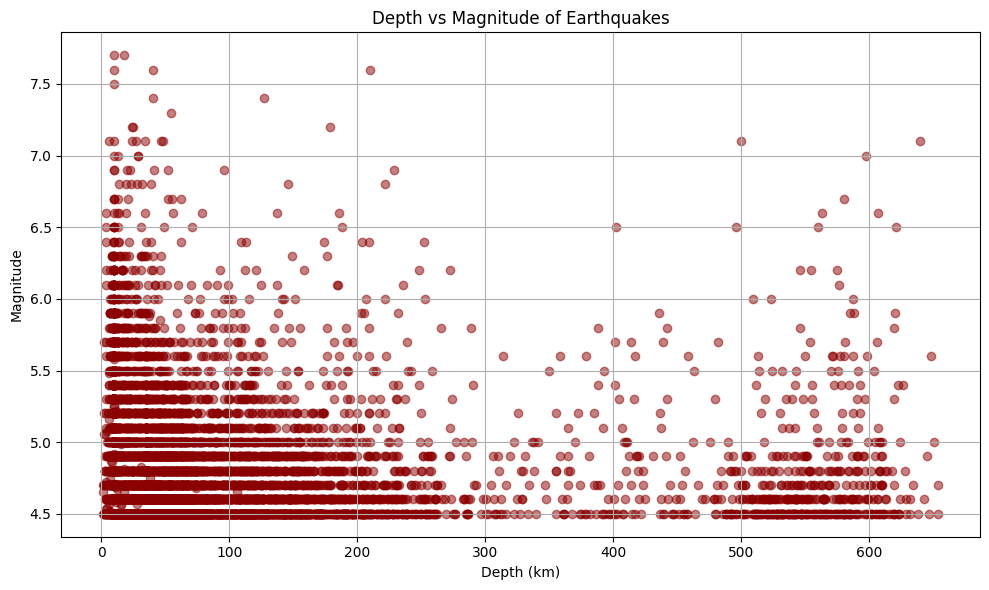

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(df['depth'], df['magnitude'], alpha=0.5, color='darkred')
plt.title('Depth vs Magnitude of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


## Objective 3: Monthly Earthquake Frequency Over Years (Heatmap)


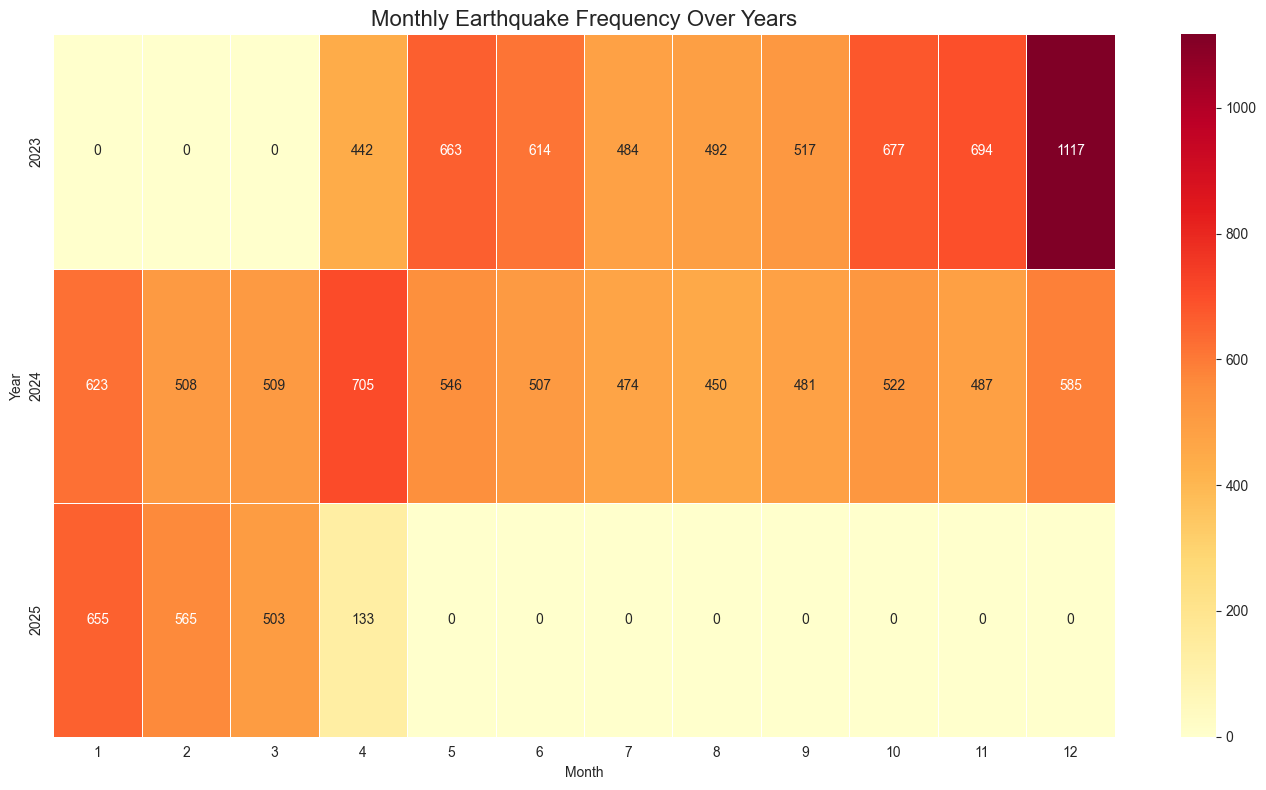

In [59]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df = df.dropna(subset=['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

monthly_counts = df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_counts, cmap="YlOrRd", linewidths=0.5, annot=True, fmt='d')

plt.title("Monthly Earthquake Frequency Over Years", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Year")

plt.tight_layout()
plt.show()


## Objective 4: Number of Earthquakes by Day of the Week (Bar Plot)


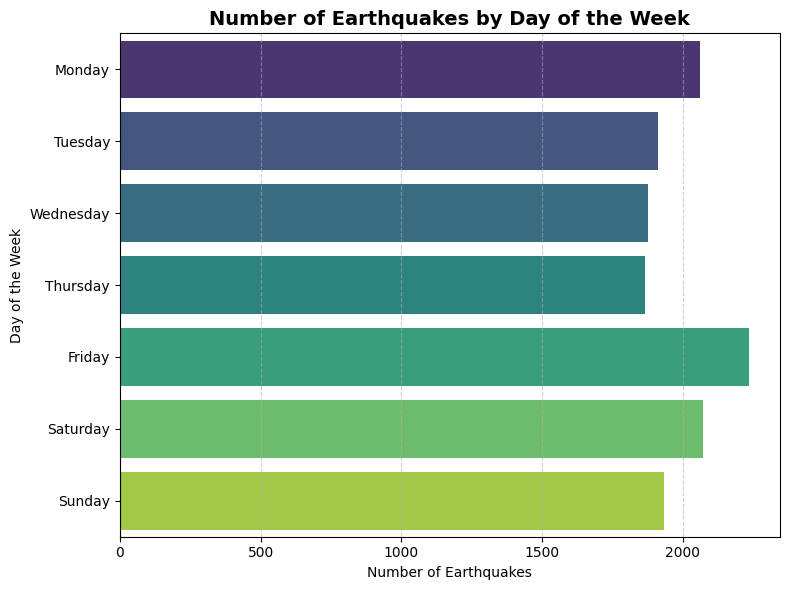

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

day_counts = df['Day_of_Week'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plot_df = pd.DataFrame({'Day': day_counts.index, 'Count': day_counts.values})

plt.figure(figsize=(8, 6))
sns.barplot(data=plot_df, x='Count', y='Day', hue='Day', palette='viridis', legend=False)
plt.title('Number of Earthquakes by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Day of the Week')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Objective 5: Global Distribution of Earthquakes (Latitude vs Longitude)


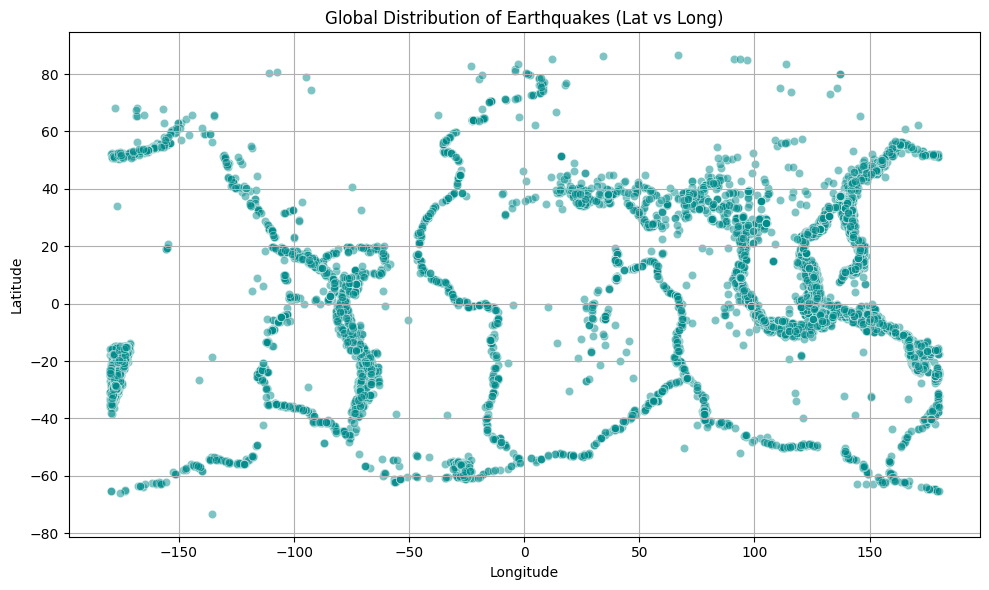

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', data=df, alpha=0.5, color='darkcyan')
plt.title('Global Distribution of Earthquakes (Lat vs Long)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


## Objective 6: Distribution of Earthquake Latitude (Violin Plot)


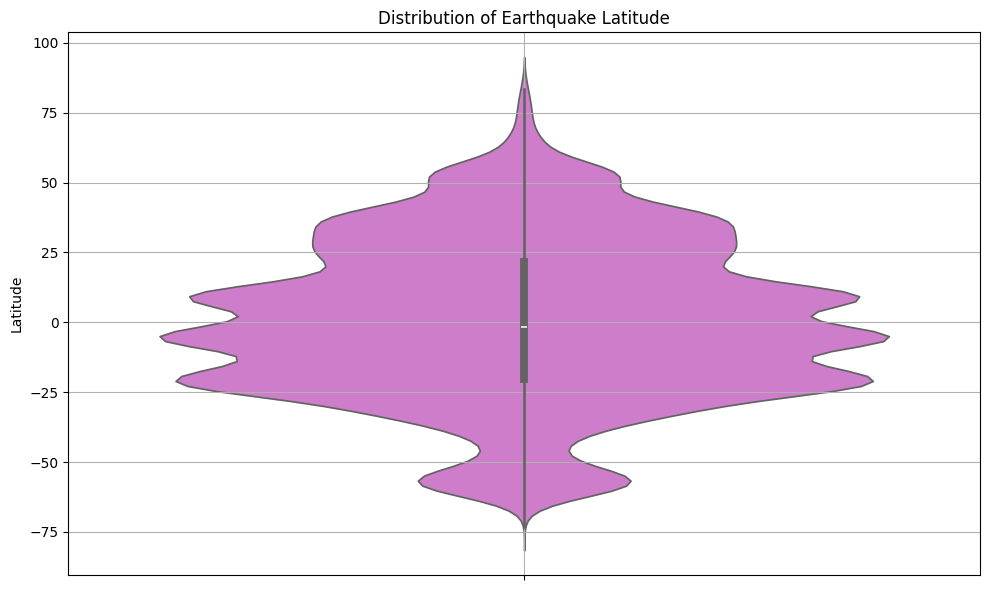

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(y=df['latitude'], color='orchid')
plt.title('Distribution of Earthquake Latitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()


## : Correlation Between Year, Latitude, and Longitude (Heatmap)


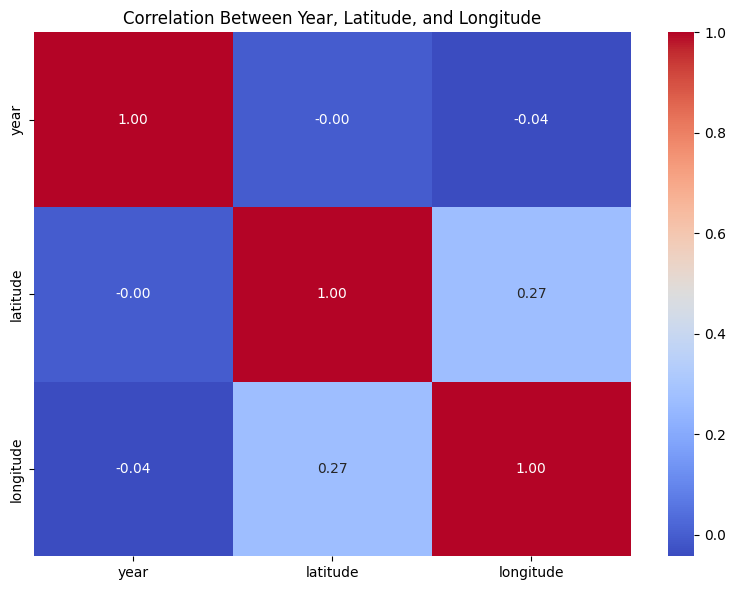

In [50]:
plt.figure(figsize=(8,6))
heatmap_data = df[['year', 'latitude', 'longitude']].dropna()
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Year, Latitude, and Longitude')
plt.tight_layout()
plt.show()


## Objective 7: Year-wise Earthquake Frequency (Bar Plot)


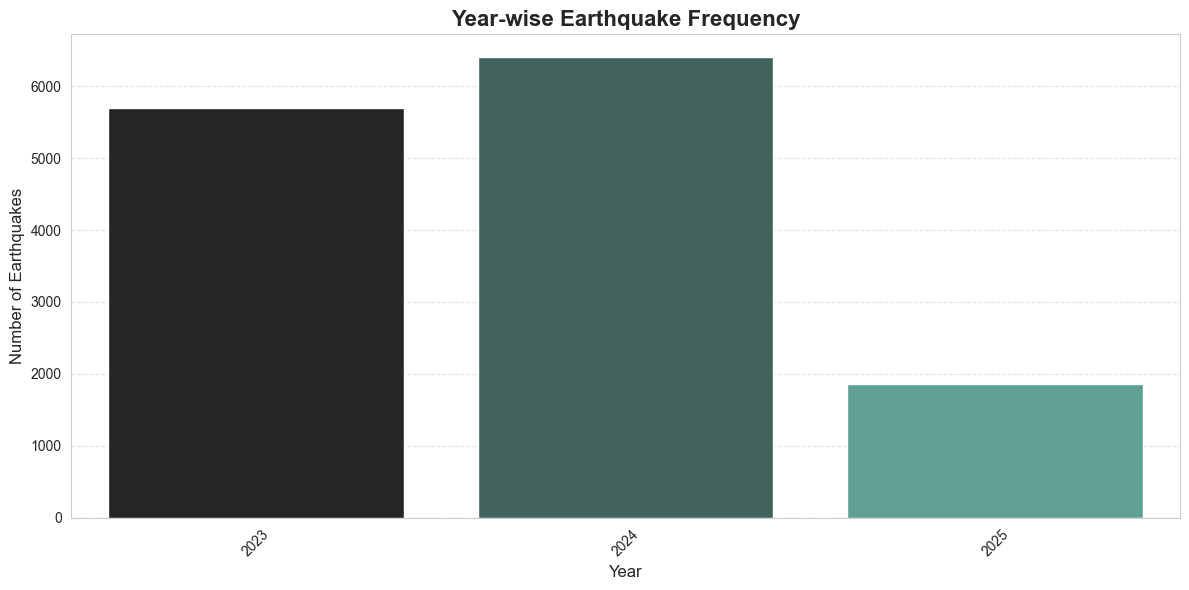

In [58]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

if 'year' not in df.columns:
    df['year'] = df['time'].dt.year

yearly_counts = df['year'].value_counts().sort_index()

year_df = pd.DataFrame({
    'Year': yearly_counts.index,
    'Count': yearly_counts.values
})

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(
    data=year_df,
    x='Year',
    y='Count',
    hue='Year',
    palette=sns.color_palette("dark:#5A9", len(year_df)),
    legend=False
)

plt.title('Year-wise Earthquake Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
